# Tutorial_05: Machine Learning Basics (机器学习基础)

In [29]:
%matplotlib inline

## 1. what is "machine learning" （问题定义）

### 1.1 定义

简单概括： 从数据中**自动**提取出知识，用于**生产新样本**或对**新样本决策**。 （1. 自动化 2.可泛化）

正式定义：

> "A program can be said to learn from **experience(经验) E** with respect to some class of **tasks(任务) T** and performance **measure(度量) P** , if its performance at tasks in T, as measured
by P, improves with experience E."   -- Tom Mitchell ([Machine Learning](https://www.amazon.com/Tom-M.-Mitchell/e/B000APT5O2/ref=sr_tc_2_0?qid=1515373999&sr=8-2-ent))

**经验**： 已知数据 （data）

    从数据中自动提取，而非人为确定规则
    
> **Now the old king is dead, long live the king!** -- song "viva la vida"
>
> **Programming is dead, long live the "[differentiable programming](https://www.facebook.com/yann.lecun/posts/10155003011462143)!** (Yann LeCun)

**任务**： 应用需求（预测）
    
    需要有可推广性（generalization）
    
    例如： 垃圾邮件识别; 资讯推荐; 手写识别(OCR); 语音识别； 自动驾驶等 

**度量**： 怎样定量描述
    
    具体工程实现所依赖的数学基础
    
    相关学科：概率统计（信息论）、最优化问题（微积分）、（线性代数）

### 1.2 一个简单例子

**经验数据** :100个人的工资水平和他平均每月的信用卡消费 

x_min: 0.31 x_max: 4.98
y_min: 0.23 y_max: 2.54


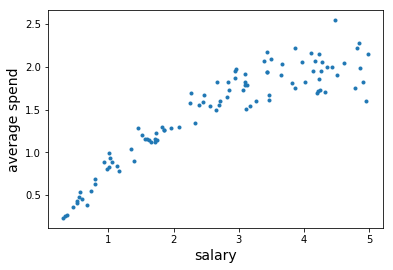

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from utils import load_salary

# x: salary, y: spending
x, y = load_salary()

print("x_min: %.2f x_max: %.2f" % (np.min(x), np.max(x)))
print("y_min: %.2f y_max: %.2f" % (np.min(y), np.max(y)))

plt.plot(x,y,'.')
plt.xlabel("salary", fontsize=14)
plt.ylabel("average spend", fontsize=14)

plt.show()


**任务**：已知新客户的工资水平是2.3万，预测该客户平均每月的信用卡消费多少

predicted spending: 1.33427619762
training score: 0.836313262415


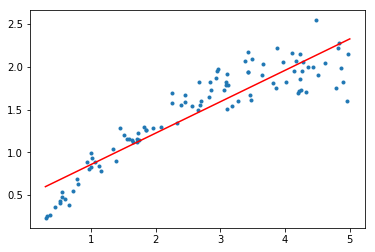

In [3]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()

estimator.fit(x, y)
pred = estimator.predict([[2.3]])
print("predicted spending: %s" % pred[0] )

score = estimator.score(x,y)
print("training score: %s" % score)

x1=np.linspace(0.3,5,20).reshape((-1, 1))
y1=estimator.predict(x1)
plt.plot(x,y,'.')
plt.plot(x1, y1, 'r-')
plt.show()


### 1.3  几种类型

根据“数据”和“任务”之间的相互关系，“机器学习”问题大致可分为如下三种类型：

- **supervised learning (监督式学习)**: labeled data (match the "tasks")
    - classification (分类)
        - binary classification
    - regression (回归)
    - *conditional generative models: such as translation, cGAN etc.
    
- **semi-supervised learning (半监督式学习)**: labeled data (but without enough information for the tasks)
    - reinforcement learning (增强学习)， delayed reward,
        - Q-learning:  only know dead or live status, learn move strategy
    - transfer learning (迁移学习)
    - adversarial learning (对抗学习): such as GAN etc.
        
- **unsupervised learning (无监督式学习)**: unlabeled data
    - clustering (聚类)
    - transformation
        - 数据的 standardization 可视为一种 unsupervised learning
    - dimensionality reduction (降维) and data compression
        - PCA
        - autoencoder etc.
    - generative models, 如：GAN， 

## 2. general procedures （操作步骤）

![train_test](images/train.jpg)

### 2.1 数据

**训练集**和**测试集**

![train_1](images/train_1.jpg)
- 训练集（training set）：用于调节“参数”
    - 验证集（validation set）：用于确保选取“超参数”的普适性
- 测试集（test set）： a simulation of "future data", 用于确保“泛化”


![train_test_split_matrix](images/train_test_split_matrix.jpg)

In [4]:
from utils import load_salary
from sklearn.model_selection import train_test_split

x, y = load_salary()

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

print(x_train.shape)
print(y_test.shape)

(80L, 1L)
(20L,)


C:\Users\Lenovo\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from utils import load_blobs, plot_blobs

x, y = load_blobs()

print(np.bincount(y))

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
print(np.bincount(y_train))

# stratify 表示按哪个变量成比例划分
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y)
print(np.bincount(y_train))

plot_blobs(x, y)

blob seed: 125
[50 50]
[37 43]
[40 40]


> tips:
> - training set 通常选取为总数据的80%左右
> - 对于小样本数据，可以通过cross validation的方式减少validation导致的数据消耗
> - 对于小样本数据，training set 内各类别成分的比例，最好同总数据的成分比例一致 （stratify split）

**数据的统计性质**

- 方差（variance）,标准差（均方差，standard deviation）：衡量数据的多样性（variance）

$$\begin{align}
& var(x) = {\sum\limits_{i}(x_i-\bar{x})^2\over n-1}\;\text{(正定)},\qquad\sigma_x = \sqrt{var(x)}
\end{align}
$$


$$$$

(对所有采样点 $x_i$求和)

- 协方差（covariance）, 关联系数（correlation）： 衡量数据的相关性

(对所有采样点 $(x_i, y_i)$求和)

$$cov(x,y) = {\sum\limits_i(x_i-\bar{x})(y_i-\bar{y})\over n-1} \;\text{(可正可负)}\qquad \rho_{xy}={cov(x,y)\over \sigma_x\sigma_y}\in [-1, 1]$$

- 信息熵： 衡量数据的多样性（diversity）

衡量数据的多样性（“信息量”）, 相对于方差更普适，且适用于离散值情形，但求解更困难

$$H(X) \equiv -\sum_i p(x_i)\log p(x_i)\;\text{(正定)}$$

(对随机变量 $X$ 所有的允许取值 $x_i$ 求和)

> 明天太阳从东边升起来。（信息量小）
>
> 恭喜你摇号中了！（信息量大）

与information gain概念密切相关


- 互信息（mutual information）： 

衡量数据的相关性, 相对于协方差更普适，且适用于离散值情形，但求解更困难

$$I(X;Y) \equiv \sum_{ij} p(x_i,y_j)\log{p(x_i, y_j)\over p(x_i)p(y_j)}\;\text{(正定)}$$

（$p(x,y)\ge p(x)p(y)$）

(对随机变量 $(X, Y)$ 所有的允许取值 $(x_i, y_j)$ 求和)


**target 和 feature candidate 之间的相关性可用于 feature selection**

In [1]:
import numpy as np
from pandas import DataFrame
from utils import load_salary
x, y = load_salary()
data = np.concatenate([x, y.reshape(-1, 1)], axis=1)

# covarience matrix
print(np.cov(data, rowvar=False))

data = DataFrame(data)
data.describe()


[[ 1.92328509  0.70698453]
 [ 0.70698453  0.31074717]]


,0,1
count,100.000000,100.000000
mean,2.677600,1.473079
std,1.386826,0.557447
min,0.310000,0.233500
25%,1.547500,1.138800
50%,2.830000,1.609250
75%,3.895000,1.912625
max,4.980000,2.544900


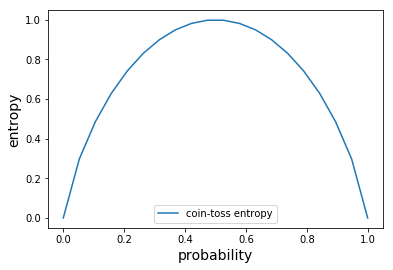

In [4]:
import numpy as np
from matplotlib import pyplot as plt

pp = np.linspace(0.000001,1-0.0000001, 20)
ss = -pp*np.log2(pp) - (1-pp)*np.log2(1-pp)
plt.plot(pp, ss, label="coin-toss entropy")
plt.xlabel("probability", fontsize=14)
plt.ylabel("entropy", fontsize=14)
plt.legend()
plt.show()

[**特征工程**](ddd)

### 2.2 超参数的选取

![train_2](images/train_2.jpg)

** “参数”与“超参数”**（hyperparameter）

“超参数”: 学习过程中选定的固定变量，fixed, 通常描述模型的某种特定“结构”约束

“参数”：学习过程中“自动”调节的模型变量, trainable, 通常描述某种特定“结构”的具体参数

** cross validation **

![cross_validation](images/cross_validation.jpg)

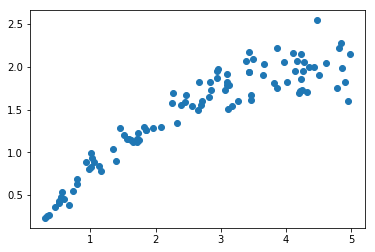

In [5]:
%matplotlib inline
from utils import load_salary
X, y = load_salary()
plt.plot(X, y, 'o')
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score


def print_cv_score(degree=1):
    estimator = LinearRegression()
    X_extend = PolynomialFeatures(degree=degree).fit_transform(X)
    scores = cross_val_score(estimator, X_extend, y, cv=5)
    # print(scores)
    print("degree: %d, score: %.6f" % (degree, np.mean(scores)))
    
#degree=2 sweet spot  
#degree=1 under-fitting
#degree>2 over-fitting
for d in [1,2,10,30]:
    print_cv_score(d) # underfitting


degree: 1, score: 0.801617
degree: 2, score: 0.903789
degree: 10, score: 0.879646
degree: 30, score: 0.671668


**under-fitting vs over-fitting** (**bias-variance tradeoff**)

![tradeoff.jpg](images/tradeoff.jpg)

** 两个不同视角来理解underfitting 和 overfitting **

- 从固定training dataset(因而model固定)，而选取不同test dataset 来看。underfitting 表示模型的推广性较好（test error和training error差别不大），但模型本身的拟合效果较差（即training error较大）；overfitting 表示模型本身的拟合能力强（training error较小），但generalization 较差（由于过分拟合training dataset的噪音，而导致 test error显著高于training error）

degree: 2, score: 0.965121
degree: 30, score: 0.718878


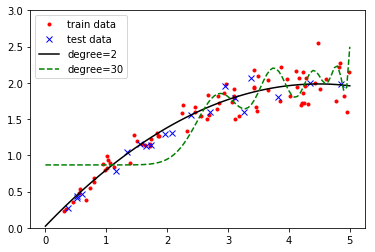

In [73]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

ax = plt.gca()
ax.plot(X_train, y_train, 'r.', label="train data")
ax.plot(X_test, y_test, 'bx', label="test data")

for i, degree in enumerate([2, 30]):
    estimator = LinearRegression()
    transformer = PolynomialFeatures(degree=degree)

    X_train_extend = transformer.fit_transform(X_train)
    X_test_extend = transformer.fit_transform(X_test)

    estimator.fit(X_train_extend, y_train)
    
    scores = estimator.score(X_test_extend, y_test)
    print("degree: %d, score: %.6f" % (degree, np.mean(scores)))
    
    xx = np.linspace(0, 5, 100).reshape((-1, 1))
    xx_extend = transformer.fit_transform(xx)
    yy = estimator.predict(xx_extend)

    ax.plot(xx, yy, ['k-', 'g--'][i], label="degree=%d" % degree)
    ax.set_ylim([0,3])
    
    plt.legend()
plt.show()



- 从不选取test dataset，但也不固定training dataset（因而model也不固定）的角度看。underfitting 表示model较稳定（不随training dataset的变化而显著变化），但模型本身的拟合能力不够用（training error较大）。overfitting 表示模型本身的拟合能力强（training error较小），但模型本身不稳定（随着training dataset的变化而显著变化）

[ -4.95917879e-10  -3.27338162e-10   3.28672189e-12   8.54613692e-13
   2.42485103e-12   6.52604573e-12   1.71272591e-11   4.39708162e-11
   1.10430634e-10   2.70837930e-10   6.46713785e-10   1.49715110e-09
   3.34160139e-09   7.13869275e-09   1.44563328e-08   2.73850395e-08
   4.76093239e-08   7.37478475e-08   9.66758222e-08   9.59732890e-08
   4.80528149e-08  -4.01657019e-08  -8.91077798e-08  -1.32528703e-09
   9.86761122e-08  -7.77157092e-08   2.92864653e-08  -6.37209231e-09
   8.21600458e-10  -5.86271206e-11   1.79184862e-12]
[ -1.11023147e-09   4.61084041e-07   5.71042584e-10   1.06038830e-10
   2.58006659e-10   6.20659715e-10   1.45723426e-09   3.34238208e-09
   7.47707599e-09   1.62608583e-08   3.42183118e-08   6.92402094e-08
   1.33611334e-07   2.43144762e-07   4.10815136e-07   6.29707463e-07
   8.43307341e-07   9.18284995e-07   6.72433158e-07   3.97428165e-08
  -6.41918300e-07  -6.09675159e-07   3.64667485e-07   6.58879103e-07
  -7.84824070e-07   3.87638638e-07  -1.10328175e-0

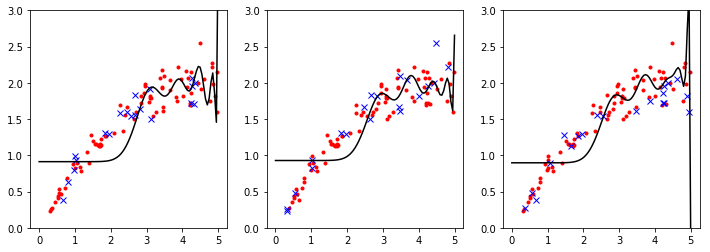

In [84]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

degree = 30
seeds = [2, 10, 20] 
estimator = LinearRegression()
transformer = PolynomialFeatures(degree=degree)

fig, axes =plt.subplots(1, 3, figsize=(12, 4))
for i, seed in enumerate(seeds):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=seed)

    axes[i].plot(X_train, y_train, 'r.', label="train data")
    axes[i].plot(X_test, y_test, 'bx', label="test data")

    X_train_extend = transformer.fit_transform(X_train)
    X_test_extend = transformer.fit_transform(X_test)

    estimator.fit(X_train_extend, y_train)

    print(estimator.coef_)
     
    xx = np.linspace(0, 5, 100).reshape((-1, 1))
    xx_extend = transformer.fit_transform(xx)
    yy = estimator.predict(xx_extend)

    axes[i].plot(xx, yy, 'k-')
    axes[i].set_ylim([0,3]) 
    
plt.show()



**减少 underfitting** 可以通过选择更合理的feature、更高阶的模型等方式来解决。

**抑制 overfitting** 则涉及一些特别的技巧。


视角1对应的方法 ：着眼于降低模型generalization error 的角度

- regularizaion（正则化）：penalize against complexity (Occam's razor 奥卡姆剃刀)

>Ridge Regularization (L2 norm):
>
>$$ R = \lambda\sum|w_i|^2 $$
>
>LASSO Regularization (L1 norm, Least Absolute Shrinkage and Selection Operator):
>
>$$ R = \lambda\sum|w_i| $$
>
>The LASSO produces sparse parameters; most of the coefficients will become zero.

（**正则化，可视为某种先验概率，详见下节**）

视角2对应的方法 ：着眼于增加模型的稳定性，或减少预测结果对模型细节的依赖性


- ensemble methods: random forest etc.
- dropout, batch normalization, data enhancement

** grid search **

brute force search for hyperparameters （暴力搜索最佳的超参数组合）

blob seed: 125


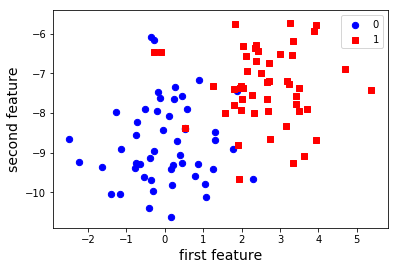

In [7]:
from utils import load_blobs, plot_blobs
from matplotlib import pyplot as plt
x, y = load_blobs()
plot_blobs(x, y)
plt.show()

In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression() # logisitic classifier

for penalty in ["l2", "l1"]:
    for C in [0.02, 1, 50]:
        scores = cross_val_score(LogisticRegression(penalty=penalty, C=C), x, y, cv=5)
        print("penalty: %s, C: %f, average score: %f" % (penalty, C, np.mean(scores)))       

penalty: l2, C: 0.020000, average score: 0.930000
penalty: l2, C: 1.000000, average score: 0.940000
penalty: l2, C: 50.000000, average score: 0.920000
penalty: l1, C: 0.020000, average score: 0.730000
penalty: l1, C: 1.000000, average score: 0.930000
penalty: l1, C: 50.000000, average score: 0.920000


In [10]:
# make use of GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.02, 1, 50], 'penalty': ["l2", "l1"]}

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, verbose=3)

grid.fit(x, y) # an interface similar to estimator
print(grid.best_score_)
print(grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] penalty=l2, C=0.02 ..............................................
[CV] ................... penalty=l2, C=0.02, score=0.95, total=   0.0s
[CV] penalty=l2, C=0.02 ..............................................
[CV] ................... penalty=l2, C=0.02, score=0.95, total=   0.0s
[CV] penalty=l2, C=0.02 ..............................................
[CV] .................... penalty=l2, C=0.02, score=0.8, total=   0.0s
[CV] penalty=l2, C=0.02 ..............................................
[CV] ................... penalty=l2, C=0.02, score=0.95, total=   0.0s
[CV] penalty=l2, C=0.02 ..............................................
[CV] .................... penalty=l2, C=0.02, score=1.0, total=   0.0s
[CV] penalty=l1, C=0.02 ..............................................
[CV] ................... penalty=l1, C=0.02, score=0.75, total=   0.0s
[CV] penalty=l1, C=0.02 ..............................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


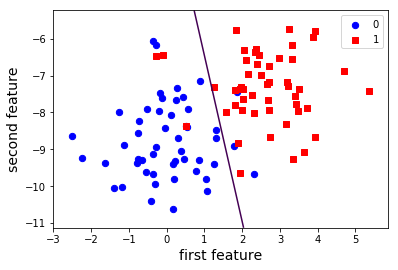

0.93999999999999995

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from utils import plot_blobs, plot_2d_boundary

clf = LogisticRegression(penalty="l2", C=1) # logisitic classifier
clf.fit(x, y)

xmin, xmax = np.min(x[:, 0])-0.5, np.max(x[:, 0])+0.5
ymin, ymax = np.min(x[:, 1])-0.5, np.max(x[:, 1])+0.5
plot_blobs(x, y)
plot_2d_boundary(clf, xmin, xmax, ymin, ymax)
plt.show()

clf.score(x,y) #accuracy
# clf.predict(x) # classification result 
# clf.predict_proba(x) # classification probs
# clf.decision_function(x) # signed distance

### 2.3 模型的建立


![train_3](images/train_3.jpg)

**两种建模方式**

“面向过程”式的模型： 如决策树， greedy search at local step，模型演化的每一步规则明确，而整体系统演化的 target 不清晰

“面向对象”式的模型： 如svm，神经网络，optimize cost function globally, 模型演化的每一步可能存在随机性，而整体系统演化的 target 非常明确

**[概率模型的数学基础](appendix_Bayes.ipynb)**

几乎所有的深度学习模型，都是概率模型

**model in scikit-learn: estimator interface**  

- estimator.fit, estimator.transform, estimator.predict, estimator.score

- 复合estimator： pipline(串联), GridSearchCV（并联）

In [17]:
# prepare data

import os

with open(os.path.join("../data", "SMSSpamCollection")) as f:
    lines = [line.strip().split("\t") for line in f.readlines()]
    
text = [p[1] for p in lines]
y = [p[0] == "ham" for p in lines]

from sklearn.model_selection import train_test_split
text_train, text_test, y_train, y_test = train_test_split(text, y)

In [22]:
# regression without pipline

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(text_train)

X_train = vectorizer.transform(text_train)
X_test = vectorizer.transform(text_test)

from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.97130559540889527

In [23]:
# regression with pipline

from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())
pipeline.fit(text_train, y_train)
pipeline.score(text_test, y_test)

0.97130559540889527

### 2.4 度量

包括 **训练模型的度量** 和 **评测模型的度量** 

![train_4](images/train_4.jpg)

**训练模型的度量** ：应用于 training 的SGD（stochastic Gradient Descent）

- 最大化 marginal distance

    代表模型 svm:  $\max\limits_{\mathbf{w},b} d_w \rightarrow \min\limits_{\mathbf{w},b} \|\mathbf{w}\|^2$

![svm_1](images/svm_1.jpg)

- 最小化 MSE（mean square error）

    代表模型线性回归、逻辑回归: $\min\limits_{\mathbf{w},b}\sum\limits_i\|y_i - f(x_i)\|^2$

- Kullback–Leibler divergence 和 cross entroy
    
    神经网络等概率模型
   
    $$H(P,Q)\equiv -\sum\limits_i p_i\log q_i$$
    $$D_{KL}(P‖Q) \equiv \sum\limits_i p_i\left(\log p_i - \log q_i\right)$$
    
    $D_{KL}(P‖Q)$, is the amount of information lost when Q is used to approximate P.    
    
    性质：

    1. 正定性：$D_{KL}(P‖Q)\ge 0 $

    2. 可加性：假设$p(x, y)\equiv p_1(x)p_2(y),\; q(x,y)=q_1(x)q_2(y)$, 则 $D_{KL}(P‖Q)=D_{KL}(P_1‖Q_1) + D_{KL}(P_2‖Q_2)$

    $H(P, Q) = H(P) + D_{KL}(P‖Q)$，因此在一个最优化问题中，若所有参数集中在Q中，则minimize $D_{KL}(P‖Q)$ 等价于 minimize $H(P,Q)$ 

- other divergence, 如 Wasserstein divergence 

**评测模型的度量** ： 一般应用于test dataset

- $R^2$-score (regression)

$$ r^2\equiv 1- {\sum (y_i - f(x_i))^2\over \sum (y_i - \bar{y})^2} $$

- Accuracy (classification)

- Confusion Matirx （classification）
<div>
<table style="border:1px solid black">
<tr> <td style="border:1px solid black">$n=175$</td><td style="border:1px solid black">predicted label0</td> <td style="border:1px solid black">predicted label1</td> <td style="border:1px solid black">predicted label2</td> </tr>
<tr><td style="border:1px solid black">actual label0</td><td style="border:1px solid black">50</td> <td style="border:1px solid black">0</td> <td style="border:1px solid black">5</td> </tr>
<tr><td style="border:1px solid black">actual label1</td><td style="border:1px solid black">0</td> <td style="border:1px solid black">54</td> <td style="border:1px solid black">3</td> </tr>
<tr><td style="border:1px solid black">actual label2</td><td style="border:1px solid black">2</td> <td style="border:1px solid black">1</td> <td style="border:1px solid black">60</td> </tr>
</table>
</div>



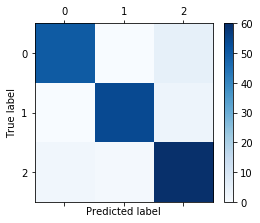

In [85]:
y_test = [0]*55 + [1]*57 + [2]*63
y_test_pred = [0]*50 + [2]*5 + [1]*54 + [2]*3 + [0]*2 + [1]*1 + [2]*60
from sklearn.metrics import confusion_matrix

plt.matshow(confusion_matrix(y_test, y_test_pred), cmap="Blues")
plt.colorbar(shrink=0.8)
plt.xticks(range(3))
plt.yticks(range(3))
plt.xlabel("Predicted label")
plt.ylabel("True label");

-  Precsion, Recall, F1-score (classification)

$$\begin{eqnarray} 
acc&=&{ TP + TN \over all}\quad\text{(对角线上的样本数占样本总数的比例)}\\
pre &=& {TP\over TP + FP} \quad\text{(某列的对角线方块占该列样本数的比例)}\\
rec &=& {TP\over TP + FN}\quad\text{(某行的对角线方块占该行样本数的比例)}\\
{2\over F} &=& {1\over pre} + {1\over rec}
\end{eqnarray} 
$$

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.96      0.91      0.93        55
          1       0.98      0.95      0.96        57
          2       0.88      0.95      0.92        63

avg / total       0.94      0.94      0.94       175



- Fall-out，ROC_AUC score (binary classification) 

应用于binary classification，如肿瘤positive/negative的诊断，或文章relevant/irrelevant的搜索

<div>
<table style="border:1px solid black">
<tr> <td style="border:1px solid black">n=50</td><td style="border:1px solid black">Predicted Positive</td> <td style="border:1px solid black">Predicted Negative</td></tr>
<tr><td style="border:1px solid black">Actual Positive</td><td style="border:1px solid black">TP=25</td> <td style="border:1px solid black">FN=2</td></tr>
<tr><td style="border:1px solid black">Actual Negative</td><td style="border:1px solid black">FP=1</td> <td style="border:1px solid black">TN=22</td></tr>
</table>
</div>

$$\mathop{\rm fallOut}={FP\over FP + TN}$$

在文本搜索问题中，即

$$\mathop{\rm fallOut}={\text{non-relevant documents}\cap\text{retrived documents}\over \text{non-relevant documents}}$$

ROC (Receiver operating characteristic ) curve: a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. (Fallout vs Recall)

$$\text{ROC_AUC score} = \text{area under ROC curve}$$

```
sklearn.metrics.roc_auc_score
```



**其他常见度量**

- confidence interval（置信区间）：An N% confidence interval for some parameter p is an interval that is expected with probability N% to contain p.

- winning rate 等